In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./datasets/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
df.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

## Make a Heatmap of all int and floats that make sense

#### There are nulls in Garage check if those make sense against garage quality. If garage quality is NaN it means there is no garage so garage area and garage cars can just be 0

In [6]:
df[df['Garage Area'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [7]:
df[(df['Garage Area'].isnull()) & (df['Garage Cars'].isnull())][['Garage Area', 'Garage Cars', 'Garage Qual']]

,Garage Area,Garage Cars,Garage Qual
1712,NaN,NaN,NaN


In [8]:
df[df['Garage Area'] == 0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,WD,119000
2039,2288,923228220,160,RM,21.0,1495,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,93900


In [9]:
df[['Garage Area', 'Garage Cars']] = df[['Garage Area', 'Garage Cars']].replace({np.nan: 0})
df[(df['Garage Area']== 0) & (df['Garage Cars'] == 0)][['Garage Area', 'Garage Cars', 'Garage Qual']]

,Garage Area,Garage Cars,Garage Qual
28,0.0,0.0,NaN
53,0.0,0.0,NaN
65,0.0,0.0,NaN
79,0.0,0.0,NaN
101,0.0,0.0,NaN
...,...,...,...
1991,0.0,0.0,NaN
2010,0.0,0.0,NaN
2027,0.0,0.0,NaN
2039,0.0,0.0,NaN


## There are many NaNs in columns that if the NaN was 0 would just indicate that there is none of whatever is NaN

#### Mas Vnr Type NaN means there is none so in the area those NaNs can be 0

In [10]:
df[(df['Mas Vnr Type'].isnull()) & (df['Mas Vnr Area'].isnull())][['Mas Vnr Area', 'Mas Vnr Type']]

,Mas Vnr Area,Mas Vnr Type
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In [11]:
df[['Mas Vnr Area']] = df[['Mas Vnr Area']].replace({np.nan: 0})

#### Basment finish type NaN means no basement so change all NaNs in surface areas to 0. Same with half and full bath

In [12]:
df[(df['BsmtFin SF 1'].isnull()) & (df['BsmtFin Type 1'].isnull())][['BsmtFin SF 1', 'BsmtFin Type 1']]

,BsmtFin SF 1,BsmtFin Type 1
1327,NaN,NaN


In [13]:
df[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']] = df[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].replace({np.nan: 0})

## Make a new column which is just the total surface area of the house and lot

In [14]:
df['totalsf'] = df['Pool Area']+df['Wood Deck SF']+ df['Open Porch SF']+df['Lot Area']+df['Enclosed Porch']+df['3Ssn Porch']+ df['Screen Porch']+df['Total Bsmt SF']+df['Gr Liv Area']+df['Garage Area']

## Make Heat map of all int or float values and correlate then show only sale price correlation

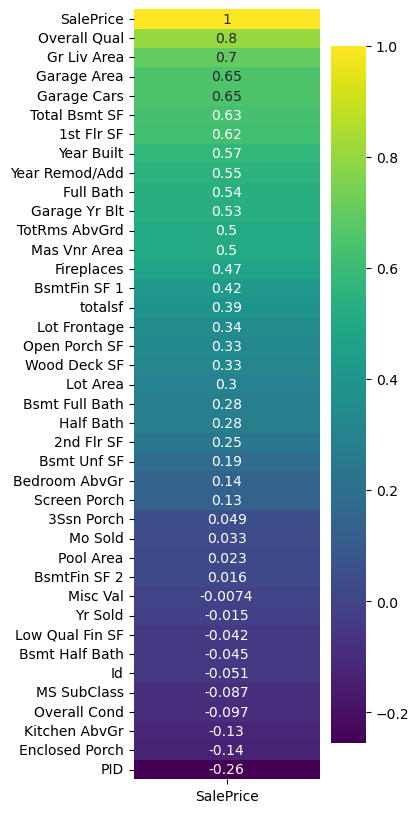

In [15]:
# df_numeric = df[['Mo Sold','Yr Sold','SalePrice','Screen Porch','Pool Area','3Ssn Porch',
#                  'Enclosed Porch','Open Porch SF','Wood Deck SF','Id','PID','MS SubClass',
#                  'Lot Area','Overall Qual','Overall Cond','Year Built','Year Remod/Add',
#                 'Mas Vnr Area','1st Flr SF','2nd Flr SF','Low Qual Fin SF','BsmtFin SF 1',
#                 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Gr Liv Area','Full Bath','Half Bath',
#                 'Kitchen AbvGr','Bedroom AbvGr','TotRms AbvGrd','Fireplaces','Garage Area','Garage Cars','Garage Yr Blt','Bsmt Half Bath','Bsmt Full Bath']]

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['int', 'float'])

# Create the heatmap
plt.figure(figsize=(3, 10))
sns.heatmap(df_numeric.corr()[['SalePrice']].sort_values(by='SalePrice',ascending = False), 
            annot=True,
            cmap='viridis');

#### Looking at this heat map Overall Condition and MS SubClass should correlate more with sale price. The MS SubClass are designation numbers so dummy variables need to be made where as the Overall Conidtion needs to be looked at more throughly.

In [16]:
# Drop the original column and join the dummies
df = pd.get_dummies(df, 
                    columns = ['MS SubClass'],
                    prefix = 'mssubclass',
                    dtype = int)
df.columns

Index(['Id', 'PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage

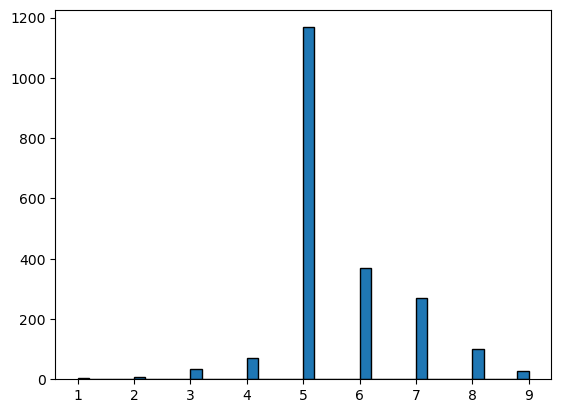

In [22]:
plt.hist(df['Overall Cond'],
        bins = 40,
        edgecolor = 'black');

#### Performed get dummies on MS SubClass to get better correlation and looked at the distribution of Overall condition to see if there was any heavy skewing. It appear the histogram is sleft skewed but is centered on 5 which is corresponds to average. This would mean other factors influcence sale price more and that the overall condition data is fine as is

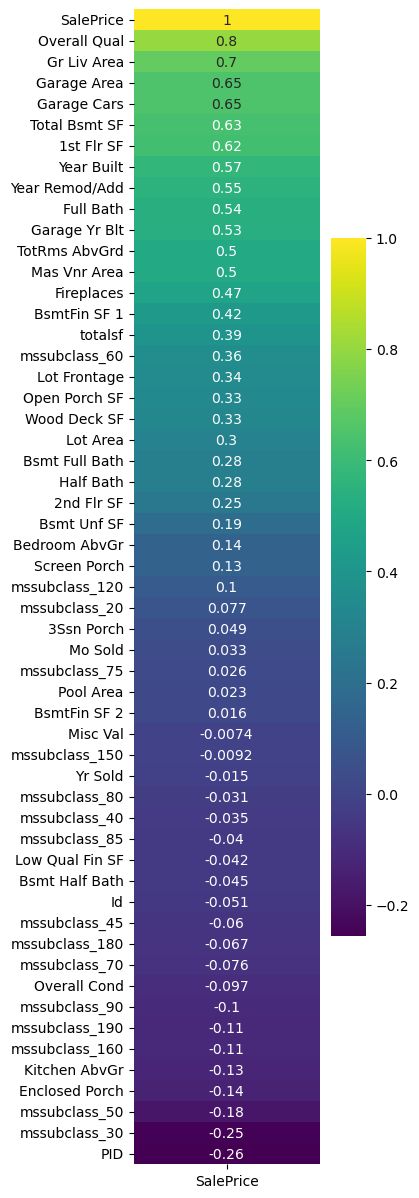

In [25]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['int', 'float'])

# Create the heatmap
plt.figure(figsize=(3, 15))
sns.heatmap(df_numeric.corr()[['SalePrice']].sort_values(by='SalePrice',ascending = False), 
            annot=True,
            cmap='viridis');

#### Replotted heat map with fixed subclass 

In [17]:
df.dtypes

Id                  int64
PID                 int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
mssubclass_120      int32
mssubclass_150      int32
mssubclass_160      int32
mssubclass_180      int32
mssubclass_190      int32
Length: 97, dtype: object

## Check Distribution of Sale Price and the Mean

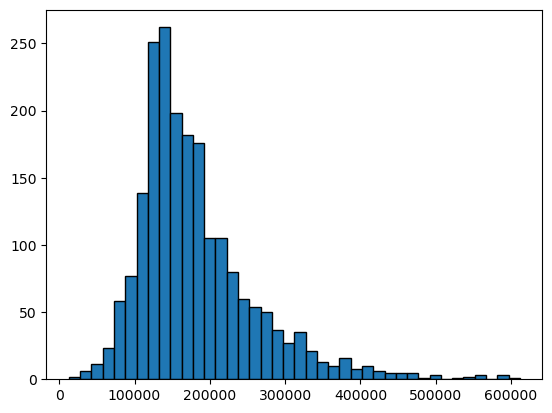

In [18]:
plt.hist(df['SalePrice'],
        bins = 40,
        edgecolor = 'black');

In [19]:
np.mean(df['SalePrice'])

181469.70160897123